In [1]:
import numpy as np
import pandas as pd
from matplotlib import style
from sklearn.svm import SVC
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (12, 6)
style.use('ggplot')

In [5]:
# Import Dataset
data = pd.read_csv('svm_data.csv', header=None)
X = data.values[:, :2]
y = data.values[:, 2]


In [35]:
X.shape
#X

(141, 2)

In [7]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1])

In [8]:
# A function to draw hyperplane and the margin of SVM classifier

# The C parameter tells the SVM optimization how much you want 
# to avoid misclassifying each training example. For large values 
# of C, the optimization will choose a smaller-margin hyperplane 
# if that hyperplane does a better job of getting all the training 
# points classified correctly. Conversely, a very small value of C 
# will cause the optimizer to look for a larger-margin separating 
# hyperplane, even if that hyperplane misclassifies more points. 
# For very tiny values of C, you should get misclassified examples, 
# often even if your training data is linearly separable.

def draw_svm(X, y, C=1.0):
    # Plotting the Points
    plt.scatter(X[:,0], X[:,1], c=y)

    # The SVM Model with given C parameter
    clf = SVC(kernel='linear', C=C)
    clf_fit = clf.fit(X, y)

    # Limit of the axes
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # Creating the meshgrid
    xx = np.linspace(xlim[0], xlim[1], 200)
    yy = np.linspace(ylim[0], ylim[1], 200)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = clf.decision_function(xy).reshape(XX.shape)

    # Plotting the boundary
    ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
    ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100, linewidth=1, facecolors='none')
    plt.show()
    # Returns the classifier
    return clf_fit

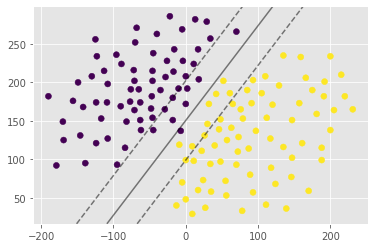

In [21]:
clf_arr = []
clf_arr.append(draw_svm(X, y, 0.0001))

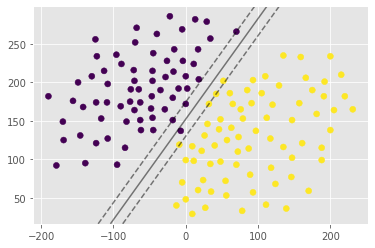

In [22]:
clf_arr.append(draw_svm(X, y, 0.001))

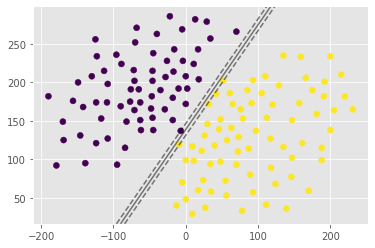

In [23]:
clf_arr.append(draw_svm(X, y, 1))

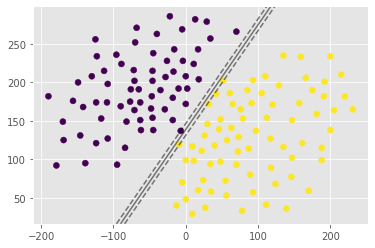

In [24]:
clf_arr.append(draw_svm(X, y, 10))

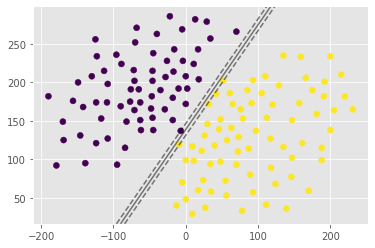

In [25]:
clf_arr.append(draw_svm(X, y, 100))

In [26]:
for i, clf in enumerate(clf_arr):
    # Accuracy Score
    print(clf.score(X, y))

0.9929078014184397
0.9929078014184397
1.0
1.0
1.0


In [28]:
for i, clf in enumerate(clf_arr):
    pred = clf.predict([(-150, 200)])
    print("pred=", pred)

pred= [0]
pred= [0]
pred= [0]
pred= [0]
pred= [0]


In [29]:
 for i, clf in enumerate(clf_arr):
    pred = clf.predict([(12, 32)])
    print("pred=", pred)

pred= [1]
pred= [1]
pred= [1]
pred= [1]
pred= [1]


In [30]:
for i, clf in enumerate(clf_arr):
    pred = clf.predict([(-250, 32)])
    print("pred=", pred)    

pred= [0]
pred= [0]
pred= [0]
pred= [0]
pred= [0]
